## Bank Churn Prediction
### Objective:

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.
### Context: 
Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.
### Data Description: 
The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.
Link to the Kaggle project site:https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

### Data Dictionary:

    RowNumber: Row number.
    CustomerId: Unique identification key for different customers.
    Surname: Surname of the customer
    Credit Score: Credit score is a measure of an individual's ability to pay back the borrowed amount. It is the numerical representation of their creditworthiness. A credit score is a 3-digit number that falls in the range of 300-900, 900 being the highest.
    Geography: The country to which the customer belongs.
    Gender: The gender of the customer.
    Age: Age of the customer.
    Tenure: The period of time a customer has been associated with the bank.
    Balance: The account balance (the amount of money deposited in the bank account) of the customer.
    NumOfProducts: How many accounts, bank account affiliated products the person has.
    HasCrCard: Does the customer have a credit card through the bank?
    IsActiveMember: Subjective, but for the concept
    EstimatedSalary: Estimated salary of the customer.
    Exited: Did they leave the bank after all?

### Points Distribution:

The points distribution for this case is as follows:
1. Read the dataset
2. Drop the columns which are unique for all users like IDs (5 points)
3. Perform bivariate analysis and give your insights from the same (5 points) 
4. Distinguish the feature and target set and divide the data set into training and test sets (5 points)
5. Normalize the train and test data (10points)
6. Initialize & build the model. Identify the points of improvement and implement the same. (20)
7. Predict the results using 0.5 as a threshold (10points)
8. Print the Accuracy score and confusion matrix (5 points)


In [146]:
# GITHUB repository: https://github.com/yogesh-singal/PGP-AIML

In [147]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


### 1. Read the dataset

In [148]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa

In [149]:
data = pd.read_csv('bank.csv');

In [150]:
data.shape

(10000, 14)

In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [152]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [153]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**Insights**
- `There are no NULL values in the data`
- `The datatypes of categorical columns need to be changed to category.`

In [154]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Insights**
- `No numerical columns have NULLs or negative values.`

In [155]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [156]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

#### Change the datatype of categorical columns to category

In [157]:
data['Geography'] = data['Geography'].astype('category')
data['Gender'] = data['Gender'].astype('category')
data['Tenure'] = data['Tenure'].astype('category')
data['NumOfProducts'] = data['NumOfProducts'].astype('category')
data['HasCrCard'] = data['HasCrCard'].astype('category')
data['IsActiveMember'] = data['IsActiveMember'].astype('category')
data['Exited'] = data['Exited'].astype('category')

print (data.dtypes)

RowNumber             int64
CustomerId            int64
Surname              object
CreditScore           int64
Geography          category
Gender             category
Age                   int64
Tenure             category
Balance             float64
NumOfProducts      category
HasCrCard          category
IsActiveMember     category
EstimatedSalary     float64
Exited             category
dtype: object


In [158]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Balance,EstimatedSalary
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,76485.889288,100090.239881
std,2886.89568,7.193619e+04,96.653299,10.487806,62397.405202,57510.492818
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,11.580000
25%,2500.75000,1.562853e+07,584.000000,32.000000,0.000000,51002.110000
50%,5000.50000,1.569074e+07,652.000000,37.000000,97198.540000,100193.915000
75%,7500.25000,1.575323e+07,718.000000,44.000000,127644.240000,149388.247500
max,10000.00000,1.581569e+07,850.000000,92.000000,250898.090000,199992.480000


### 2. Drop the columns which are unique for all users like IDs (5 points)

In [159]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [160]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Univariate data analysis

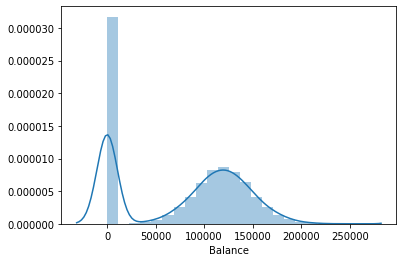

In [161]:
sns.distplot(data.Balance)

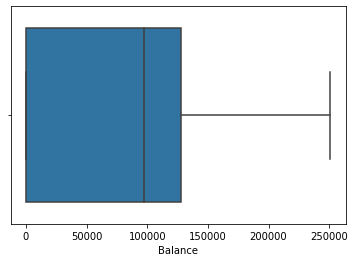

In [162]:
sns.boxplot(data.Balance)

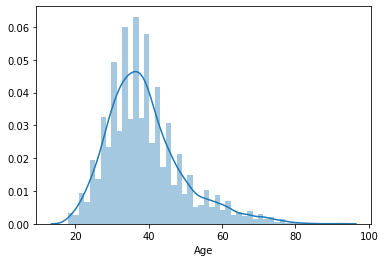

In [163]:
sns.distplot(data.Age)

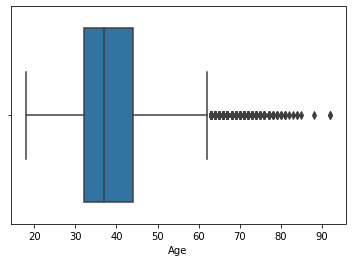

In [164]:
sns.boxplot(data.Age)

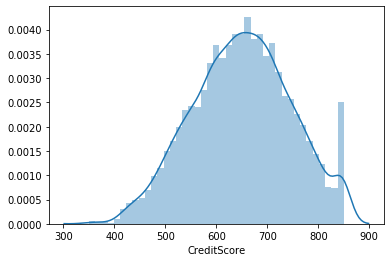

In [165]:
sns.distplot(data.CreditScore)

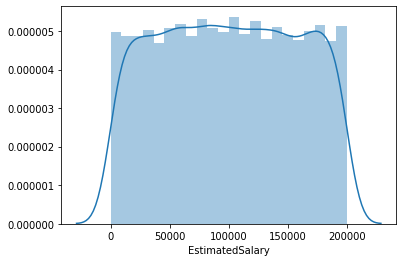

In [166]:
sns.distplot(data.EstimatedSalary)

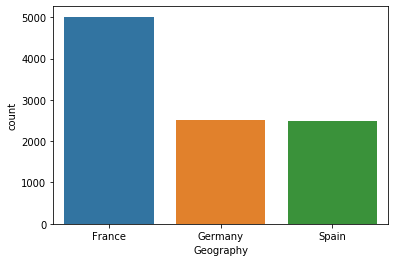

In [167]:
sns.countplot(data.Geography)

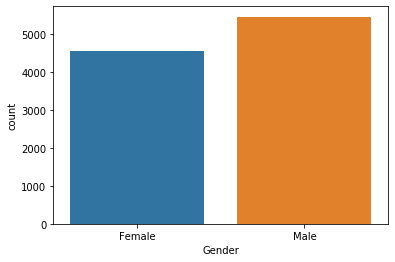

In [168]:
sns.countplot(data.Gender)

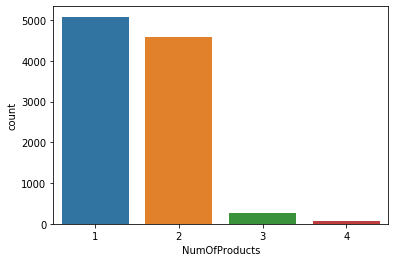

In [169]:
sns.countplot(data.NumOfProducts)

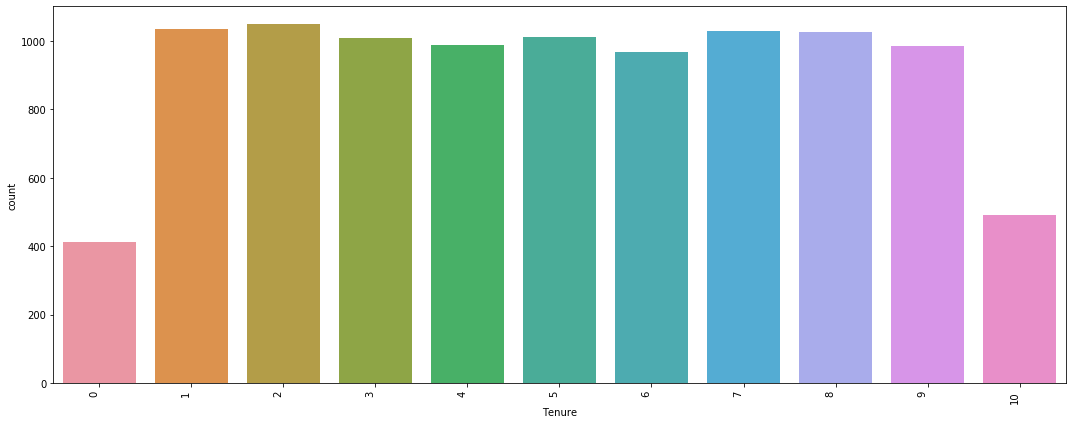

In [170]:
plt.figure(figsize=(15,6))
ax = sns.countplot(data.Tenure)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

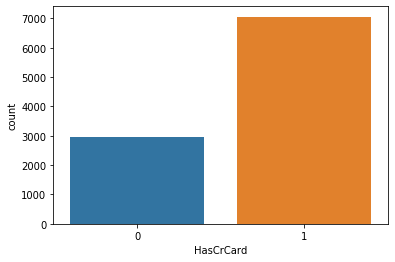

In [171]:
sns.countplot(data.HasCrCard)

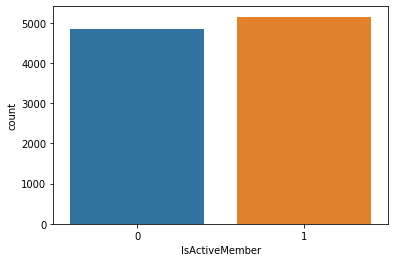

In [172]:
sns.countplot(data.IsActiveMember)

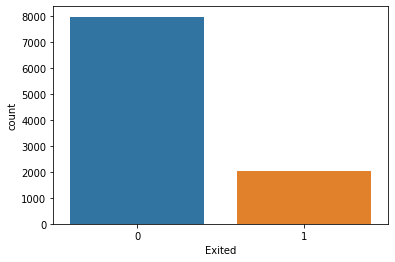

In [173]:
sns.countplot(data.Exited)

### 3. Multivariate data analysis (5 marks)

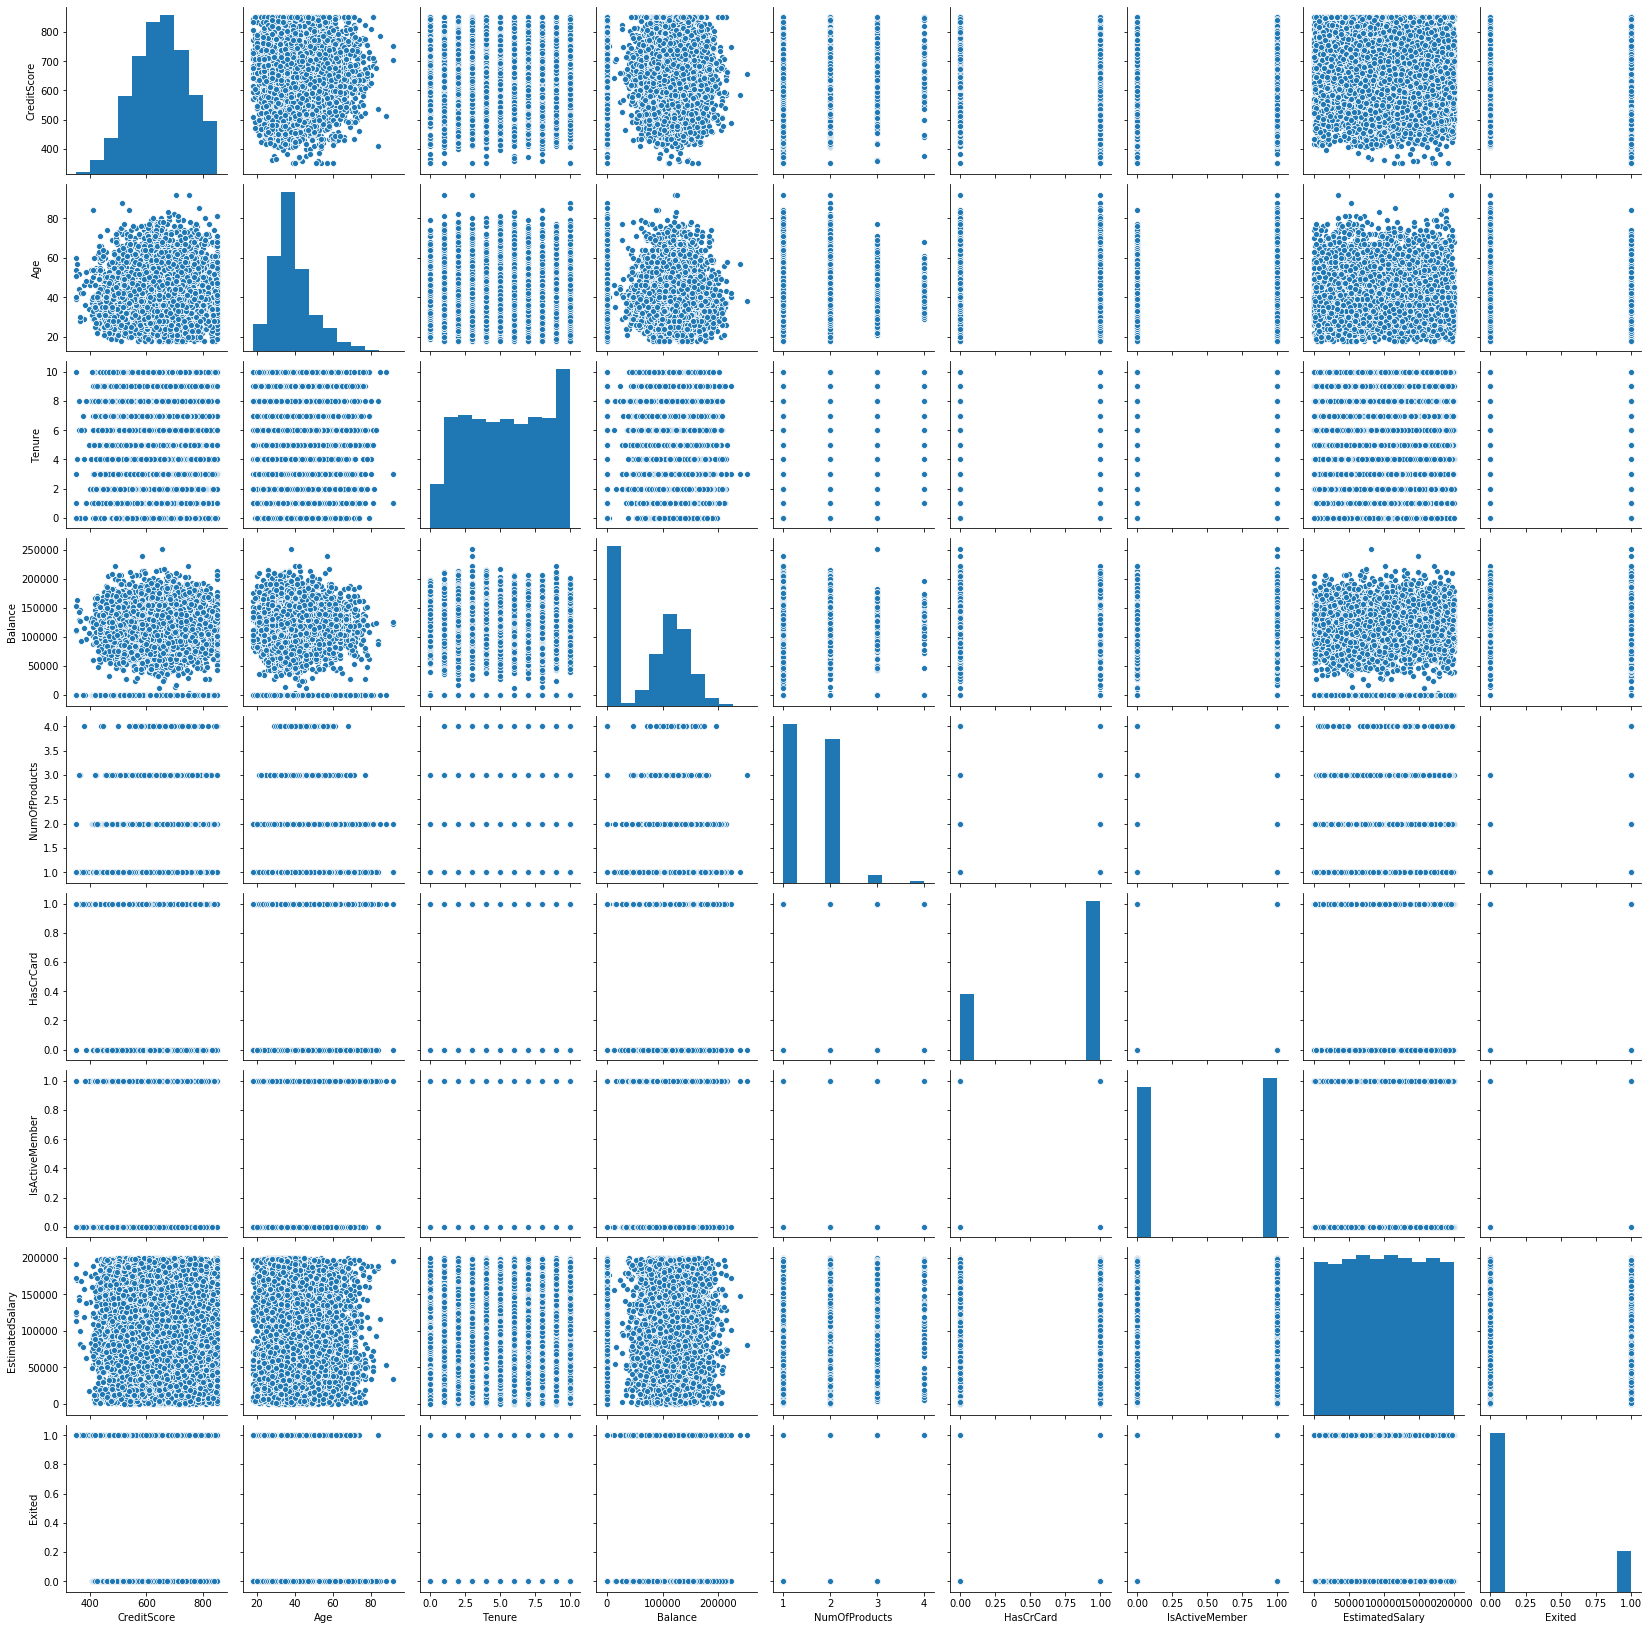

In [174]:
sns.pairplot(data)
plt.show()

In [175]:
# look at the target column 'Exited' to understand how the data is distributed amongst the various values
data.groupby(["Exited"]).mean()

,CreditScore,Age,Balance,EstimatedSalary
Exited,,,,
0,651.853196,37.408389,72745.296779,99738.391772
1,645.351497,44.837997,91108.539337,101465.677531


In [176]:
# look at the target column 'Personal Loan' to understand how the data is distributed amongst the various values
data.groupby(["Exited"]).median()

,CreditScore,Age,Balance,EstimatedSalary
Exited,,,,
0,653,36,92072.68,99645.04
1,646,45,109349.29,102460.84


In [177]:
pd.crosstab(data['Tenure'], data['Exited'],normalize='index')

Exited,0,1
Tenure,,
0,0.769976,0.230024
1,0.775845,0.224155
2,0.808206,0.191794
3,0.788900,0.211100
4,0.794742,0.205258
5,0.793478,0.206522
6,0.797311,0.202689
7,0.827821,0.172179
8,0.807805,0.192195


In [178]:
pd.crosstab(data['Geography'], data['Exited'],normalize='index')

Exited,0,1
Geography,,
France,0.838452,0.161548
Germany,0.675568,0.324432
Spain,0.833266,0.166734


In [179]:
pd.crosstab(data['Gender'], data['Exited'],normalize='index')

Exited,0,1
Gender,,
Female,0.749285,0.250715
Male,0.835441,0.164559


In [180]:
pd.crosstab(data['NumOfProducts'], data['Exited'],normalize='index')

Exited,0,1
NumOfProducts,,
1,0.722856,0.277144
2,0.924183,0.075817
3,0.172932,0.827068
4,0.000000,1.000000


In [181]:
pd.crosstab(data['HasCrCard'], data['Exited'],normalize='index')

Exited,0,1
HasCrCard,,
0,0.791851,0.208149
1,0.798157,0.201843


In [182]:
pd.crosstab(data['IsActiveMember'], data['Exited'],normalize='index')

Exited,0,1
IsActiveMember,,
0,0.731491,0.268509
1,0.857309,0.142691


**Insights**
- `Customers from Germany and females are more likely to leave`
- `The higher the number of products subscribed to, the more the chance the customer will leave`
- `Possession of a credit card of the bank has no predictive value about customer retention. Hence can possibly drop the HasCrCard column`
- `Customers who are inactive seem to be more liable to leave`

In [183]:
# data = data.drop('HasCrCard', axis = 1)

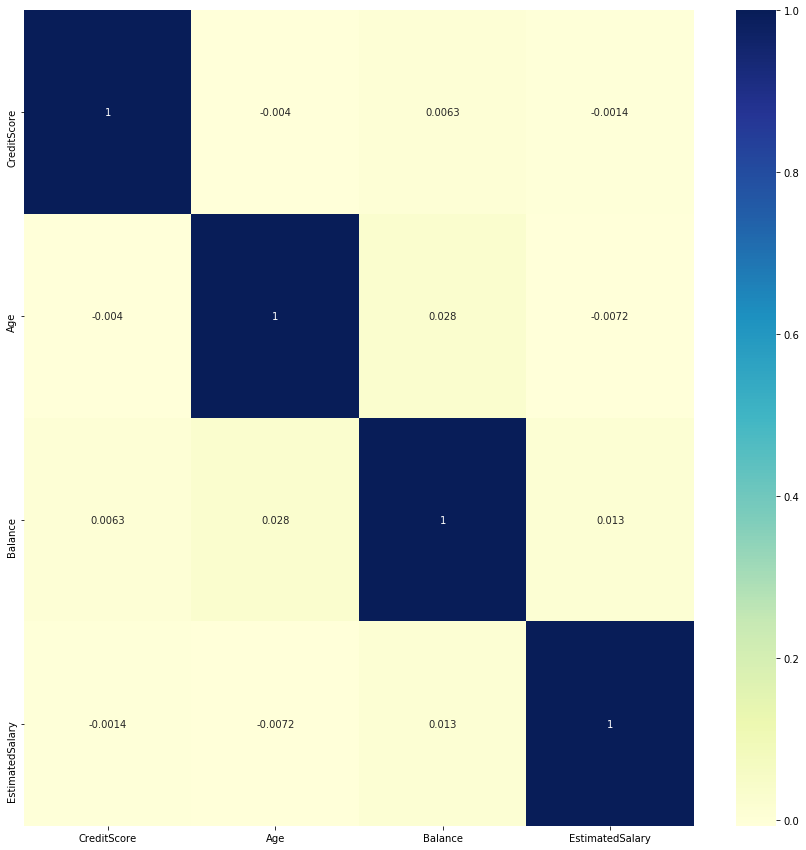

In [184]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot = True, fmt='.2g',cmap= "YlGnBu")

**Insights:**
- `None of the numerical variables are highly correlated`

### 4. Distinguish the feature and target set and divide the data set into training and test sets (5 points)


In [185]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X = data.drop(['Exited'], axis=1)
X = pd.get_dummies(X, drop_first=True)
Y = data['Exited']   # Predicted class (yes=True, no=False)


x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
x_train.head()
#y_train.head()

,CreditScore,Age,Balance,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Tenure_1,Tenure_2,Tenure_3,...,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_1,IsActiveMember_1
2228,644,37,0.00,20968.88,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
5910,481,39,0.00,24677.54,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
1950,680,37,123806.28,81776.84,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2119,690,29,0.00,108577.97,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
5947,656,45,145933.27,199392.14,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1


### 5. Normalize the train and test data (10points)

In [186]:
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(x_train)

# Scale the train set
x_train = scaler.transform(x_train)

# Scale the test set
x_test = scaler.transform(x_test)

### 6. Initialize & build the model. Identify the points of improvement and implement the same. (20)

#### Deep Neural Network

In [187]:
# Using Tensorflow Keras instead of the original Keras

from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model

input_layer = Input(shape=(X.shape[1],))
dense_layer_1 = Dense(15, activation='linear')(input_layer)
dense_layer_2 = Dense(10, activation='linear')(dense_layer_1)
output = Dense(1, activation='sigmoid')(dense_layer_2)

model = Model(inputs=input_layer, outputs=output)

# Set threshold at 0.5
tf.keras.metrics.BinaryAccuracy(name="binary_accuracy", dtype=None, threshold=0.5)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.BinaryAccuracy()])
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 22)]              0         
_________________________________________________________________
dense_6 (Dense)              (None, 15)                345       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 516
Trainable params: 516
Non-trainable params: 0
_________________________________________________________________


In [188]:
history = model.fit(x_train, y_train, batch_size=10, epochs=50, verbose=1, validation_split=0.2)

Epoch 1/50
560/560 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - binary_accuracy: 0.7080 - val_loss: 0.0000e+00 - val_binary_accuracy: 0.8350
Epoch 2/50
560/560 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - binary_accuracy: 0.8302 - val_loss: 0.0000e+00 - val_binary_accuracy: 0.8343
Epoch 3/50
560/560 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - binary_accuracy: 0.8215 - val_loss: 0.0000e+00 - val_binary_accuracy: 0.8329
Epoch 4/50
560/560 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - binary_accuracy: 0.8324 - val_loss: 0.0000e+00 - val_binary_accuracy: 0.8329
Epoch 5/50
560/560 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - binary_accuracy: 0.8333 - val_loss: 0.0000e+00 - val_binary_accuracy: 0.8329
Epoch 6/50
560/560 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - binary_accuracy: 0.8326 - val_loss: 0.0000e+00 - val_binary_accuracy: 0.8329
Epoch 7/50
560/5

### 7. Predict the results using 0.5 as a threshold (10points)

In [189]:
score = model.evaluate(x_test, y_test, verbose=1)

print("Test Loss Score:", score[0])
print("Test Accuracy:", score[1])

94/94 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - binary_accuracy: 0.8350
Test Loss Score: 0.0
Test Accuracy: 0.8349999785423279


In [190]:
y_predict = np.round(model.predict(x_test))

### 8. Print the Accuracy score and confusion matrix (5 points)

In [191]:
from tensorflow.keras import metrics
from tensorflow_addons.metrics import F1Score

## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = tf.math.confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Training accuracy 0.832
Testing Accuracy: 0.835
Confusion Matrix


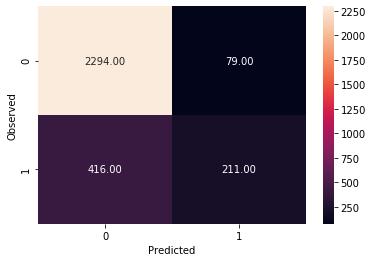

None

Recall: 0.33652312
Precision: 0.7275862
F1 Score: 0.46019628314423083
Roc Auc Score: 0.6516159


In [193]:
m0 = metrics.Accuracy()
m0.update_state(y_test, y_predict)
print("Training accuracy",0.832)  
print("Testing Accuracy:", m0.result().numpy()) 
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
m = metrics.Recall()
m.update_state(y_test, y_predict)
m1 = metrics.Precision()
m1.update_state(y_test, y_predict)
m2 = metrics.AUC()
m2.update_state(y_test, y_predict)

print("Recall:", m.result().numpy()) 
print("Precision:", m1.result().numpy())
print("F1 Score:", 2*m1.result().numpy()*m.result().numpy()/(m1.result().numpy()+m.result().numpy()))
print("Roc Auc Score:", m2.result().numpy())

#### CONCLUSION

`Confusion matrix means`

*True Positive (observed=1,predicted=1):*
Predicted that customer will exit and the customer did in fact exit

*False Positive (observed=0,predicted=1):*
Predicted that customer will exit but the customer stayed with the bank

*True Negative (observed=0,predicted=0):*
Predicted that customer will stay with the bank and the customer stayed

*False Negative (observed=1,predicted=0):*
Predicted that customer will stay with the bank but the customer exited

The bank wants to predict customer retention based on previously collected statistics i.e. **high True Positive rate and high True Negative rate**, if TP & TN are high, the bank's campaign will be deemed successful. Hence **Accuracy & Precision are the important metrics** here.

In case of False negative bank will lose a few customers but that is okay as long as the True Negative rate is high. Correctly identifying the customers who are likely to exit will eliminate wasteful customer retention spend. Recall is an important metric but even after repeated analysis, dropping columns and tweaking the model, it was not possible to get a Recall rate much above 33%. 